#Lab8 - Noisy annotators

On this lab session we will focus on working with noisy annotators.

In real life tagging scenarios, we usually obtain annotations from human experts. Humans usually are imperfect and therefore make mistakes. This is why if we have access to multiple annotators we consider methods of ground truth estimation, e.g. majority voting.

---
Lets start by loading the annotation data.
You can find prepared annotations for MNIST dataset in file `mnist_tags.npy` uploaded to the moodle with the scenario.

In [10]:
import numpy as np


tags = np.load('mnist_tags.npy')
# X = np.load('mnist_X.npy') X is not needed in this scenario, we assume in the algorithms that experts performance does depend on features of the samples.
y = np.load('mnist_y.npy')

Tags is of shape `(n_samples, n_classes, n_annotators)`.
It contains:
- `nan` if an annotator hasn't labelled this sample at all
- 0 if he has labelled the sample and didn't indicate considered class
- 1 if he has labelled the sample and indicated that it belongs to considered class

In [12]:
print(f"Annotations shape: {tags.shape}")
print(tags[:3, :, 10:])

Annotations shape: (70000, 10, 15)
[[[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan  1. nan nan nan]
  [nan  0. nan nan nan]
  [nan  0. nan nan nan]
  [nan  0. nan nan nan]
  [nan  1. nan nan nan]
  [nan  0. nan nan nan]
  [nan  0. nan nan nan]
  [nan  0. nan nan nan]
  [nan  0. nan nan nan]
  [nan  0. nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]]


Some of the objects are not annotated at all, some of them are annotated only by a single person and some by multiple annnotators. 

Average number of tags per exp 2549.0 
 Number of tags per expert [9413 1566 5111 2862 4488  476 3059  620 2447  250 1493  794 1465  883
 3308]


<BarContainer object of 15 artists>

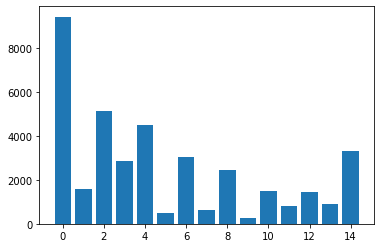

In [9]:
import matplotlib.pyplot as plt

number_of_tags = np.sum(np.any(~np.isnan(tags), axis=1), axis=0)

print(f"Average number of tags per exp {number_of_tags.mean()} \n Number of tags per expert {number_of_tags}")
plt.bar(range(len(number_of_tags)), number_of_tags)

The ground truth labels, which can be used to estimate the quality of the methods are also binarized and represented in one-hot style.

In [7]:
print(y.shape)
print(y[1])

(70000, 10)
[1 0 0 0 0 0 0 0 0 0]


1. Create a function that evaluates the experts performance. Plot the histogram of their performance.

2. Create a majority voting consensus alogrithm, i.e. estimate the ground truth by choosing the class for which majority of experts that annotated the sample voted.

Evaluate the performance of the majority voting algorithm.

3. Create a consensus voting algorithm.

(Based on: http://www.umiacs.umd.edu/labs/cvl/pirl/vikas/publications/raykar_JMLR_2010_crowds.pdf)

In consensus voting we esitmate the performance of each expert basing on their true positive rate and true negative rate for each  class. 

The algorithm is an instance of  Expectiation-Maximization algorithms class and works as follows:
  
  1. Compute the majority voting to estimate initial ground truths.
  2. Estimate the performance of the experts basing on the equation: (M step)
    
  $$
  tpr_a = \frac{\sum_{x \in X} \hat{p}(y = 1 | x) \cdot p_a( y = 1 | x)}{\sum_{x \in X} \hat{p}(y = 1 | x) }
  $$

  $$
  tnr_a = \frac{\sum_{x \in X} \hat{p}(y = 0 | x) \cdot p_a( y = 0 | x)}{\sum_{x \in X} \hat{p}(y = 0 | x) }
  $$
  3. Estimate the probability distribution of classes for each sample basing on current experts performance estimation. (E step)
  $$
  p_{score}(y=1 | x) = p(y = 1) ⋅\prod_{a \in A } [tpr_a]^{p_a(y = 1 | x)} [1 - tpr_a]^{1 - p_a(y = 1 | x)}
  $$

  $$
  p_{score}(y=0 | x) = p(y = 0) ⋅\prod_{a \in A } [tnr_a]^{p_a(y = 0 | x)} [1 - tnr_a]^{1 - p_a(y = 0 | x)}
  $$

  $$
  \hat{p}(y = 1 | x) = \frac{p_{score}(y=1 | x)}{p_{score}(y=1 | x) + p_{score}(y=0 | x)}
  $$
  4. Repeat steps 2 and 3 until the probability distributions converge. 

4. Evaluate the performance of consensus voting algorithm.

5*. Train a model on estimated labels using consensus voting, majority voting and ground truths, compare their performance.